# Finding out the fluctuations on expiry days: 2015-Jan-15 to 2021-May-12

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

In [2]:
df = pd.read_csv('../data/NIFTY50_5minute.csv')

In [3]:
dates = df.Date.drop_duplicates().reset_index(drop=True)

In [4]:
def allThursdays(year):
    return pd.date_range(start=str(year), end=str(year+1), 
                         freq='W-THU').strftime('%m/%d/%Y').tolist()

f = []
f.append(allThursdays(2015))
f.append(allThursdays(2016))
f.append(allThursdays(2017))
f.append(allThursdays(2018))
f.append(allThursdays(2019))
f.append(allThursdays(2020))
f.append(allThursdays(2021))

In [5]:
allThrs = [item for sublist in f for item in sublist]

In [6]:
# '11/11/2015' and '11/07/2018' are Wednesday - muhurat days - trading happened in late eve for an hour
holidays2015 = ['04/02/2015', '09/17/2015', '10/22/2015', '11/11/2015', '11/12/2015'] #last two days are diwali, remove both
holidays2016 = ['03/24/2016', '04/14/2016']
holidays2017 = ['01/26/2017', '10/19/2017'] # trading happened on 10/19 muhurat one - so remove this and don't include prev Wed
holidays2018 = ['03/29/2018', '09/13/2018', '09/20/2018', '10/18/2018', '11/07/2018', '11/08/2018'] # remove last two - diwali
holidays2019 = ['03/21/2019', '08/15/2019']
holidays2020 = ['04/02/2020']
holidays2021 = ['03/11/2021', '05/13/2021']

In [7]:
# removing Thrusdays where muhurat fell on Wednesdays
allThrs.remove(holidays2015[4])
allThrs.remove(holidays2017[1])
allThrs.remove(holidays2018[5])

In [8]:
# Replacing Thrusdays with Wednesdays where Thrusdays were holidays
ThursOff = holidays2015[:3] + holidays2016 + holidays2017[:1] + holidays2018[:4] + holidays2019 + holidays2020 + holidays2021

allThrs = ['04/01/2015' if aDate == ThursOff[0] else aDate for aDate in allThrs]
allThrs = ['09/16/2015' if aDate == ThursOff[1] else aDate for aDate in allThrs]
allThrs = ['10/21/2015' if aDate == ThursOff[2] else aDate for aDate in allThrs]
allThrs = ['03/23/2016' if aDate == ThursOff[3] else aDate for aDate in allThrs]
allThrs = ['04/13/2016' if aDate == ThursOff[4] else aDate for aDate in allThrs]
allThrs = ['01/25/2017' if aDate == ThursOff[5] else aDate for aDate in allThrs]
allThrs = ['03/28/2018' if aDate == ThursOff[6] else aDate for aDate in allThrs]
allThrs = ['09/12/2018' if aDate == ThursOff[7] else aDate for aDate in allThrs]
allThrs = ['09/19/2018' if aDate == ThursOff[8] else aDate for aDate in allThrs]
allThrs = ['10/17/2018' if aDate == ThursOff[9] else aDate for aDate in allThrs]
allThrs = ['03/20/2019' if aDate == ThursOff[10] else aDate for aDate in allThrs]
allThrs = ['08/14/2019' if aDate == ThursOff[11] else aDate for aDate in allThrs]
allThrs = ['04/01/2020' if aDate == ThursOff[12] else aDate for aDate in allThrs]
allThrs = ['03/10/2021' if aDate == ThursOff[13] else aDate for aDate in allThrs]
allThrs = ['05/12/2021' if aDate == ThursOff[14] else aDate for aDate in allThrs]

In [9]:
# The DataFrame that holds all the expiry days from 15th Jan 2015 till 13th May 2021
targetDays = df[pd.to_datetime(df.Date).isin(pd.to_datetime(allThrs))].reset_index(drop=True)
targetDays = targetDays.drop_duplicates().reset_index(drop=True) # Removing 13 duplicate days from the raw scraped data

In [10]:
# 35 Thrusdays from allThrs are not included in targetDays (Jan 1, Jan 8 from 2015 and all Thrs after May 13)
len(allThrs), targetDays.shape 

(363, (24600, 9))

In [11]:
# Currently, we got only 328 expiry days to analyze
targetDays.shape[0]/75

328.0

In [12]:
# # Code to visualize all the signals in a single plot - Doesn't provide any fruitful results 
# fig, ax = plt.subplots(figsize=(20, 10))
# cnt = 0
# for i in range(328):
#     ax.plot(np.arange(75), targetDays.Close[cnt:cnt+75])
#     ax = ax.twinx()
#     cnt += 75

# Going mathematically now since visualization didn't help here due to overlapping 328 signals

# 15 minutes difference in price heatmaps

In [13]:
diffArr = []
cnt = 0
for i in range(328):
    point = (targetDays.Close[cnt:cnt + 75]).values.reshape(25,3)
    diffArr.append(point.max(axis=1) - point.min(axis=1))
    cnt += 75

In [14]:
#allThrs has 35 extra values as stated in above cells, removing those and calculating number of expiries in each year
pd.DataFrame(pd.Series(allThrs[2:330]).str.split('/', expand=True)).groupby(2).count()

,0,1
2,,
2015,50,50
2016,52,52
2017,51,51
2018,51,51
2019,52,52
2020,53,53
2021,19,19


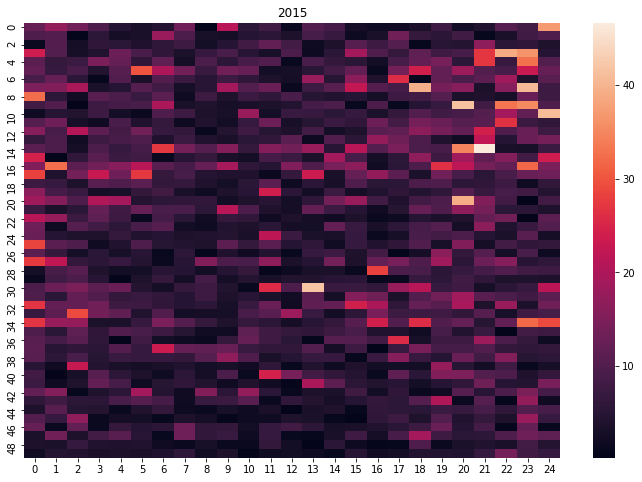

In [15]:
changeDF = pd.DataFrame(diffArr)

plt.figure(figsize=(12, 8))
sns.heatmap(changeDF.iloc[:50,:]).set_title("2015")
plt.show()

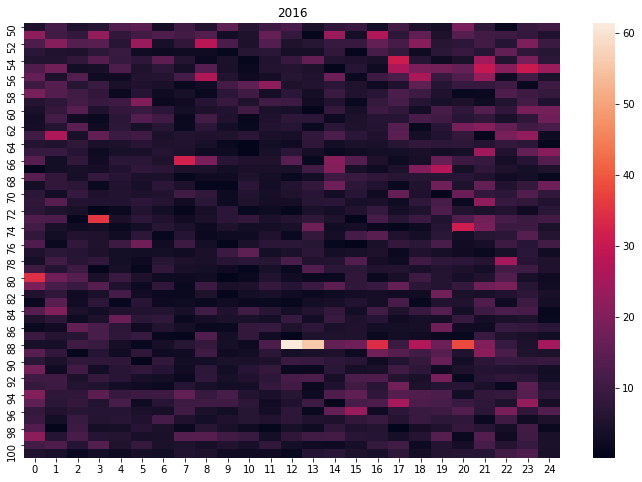

In [16]:
plt.figure(figsize=(12, 8))
sns.heatmap(changeDF.iloc[50:102,:]).set_title("2016")
plt.show()

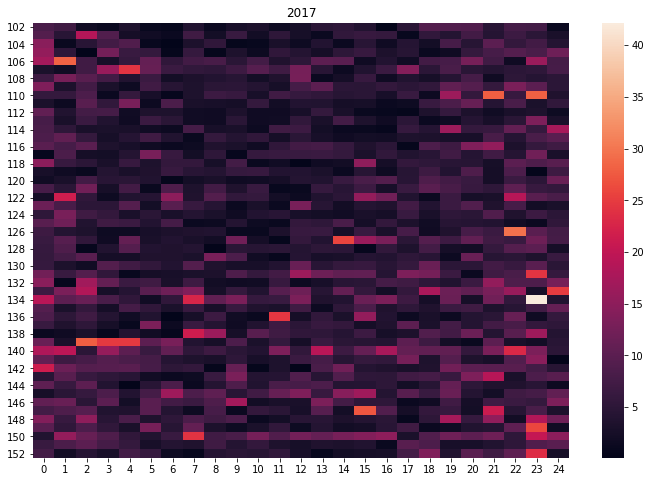

In [17]:
plt.figure(figsize=(12, 8))
sns.heatmap(changeDF.iloc[102:153,:]).set_title("2017")
plt.show()

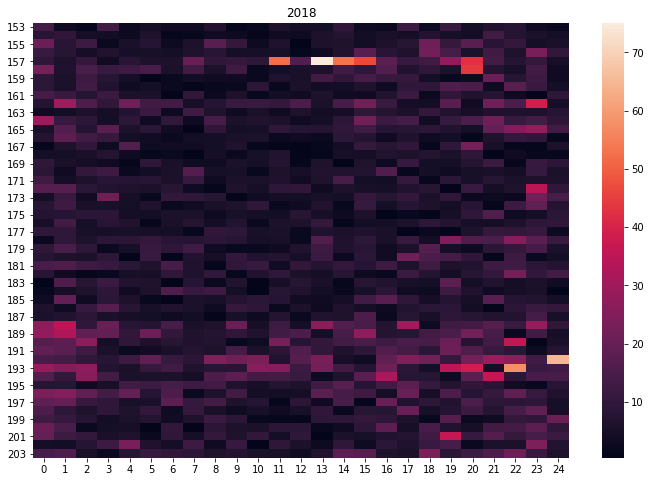

In [18]:
plt.figure(figsize=(12, 8))
sns.heatmap(changeDF.iloc[153:204,:]).set_title("2018")
plt.show()

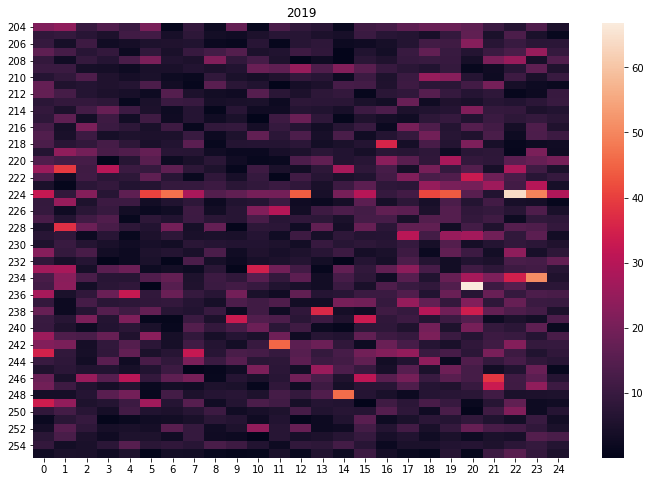

In [19]:
plt.figure(figsize=(12, 8))
sns.heatmap(changeDF.iloc[204:256,:]).set_title("2019")
plt.show()

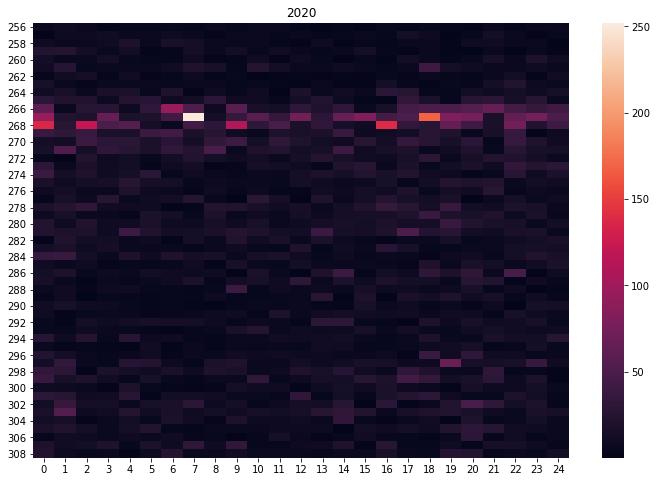

In [20]:
plt.figure(figsize=(12, 8))
sns.heatmap(changeDF.iloc[256:309,:]).set_title("2020")
plt.show()

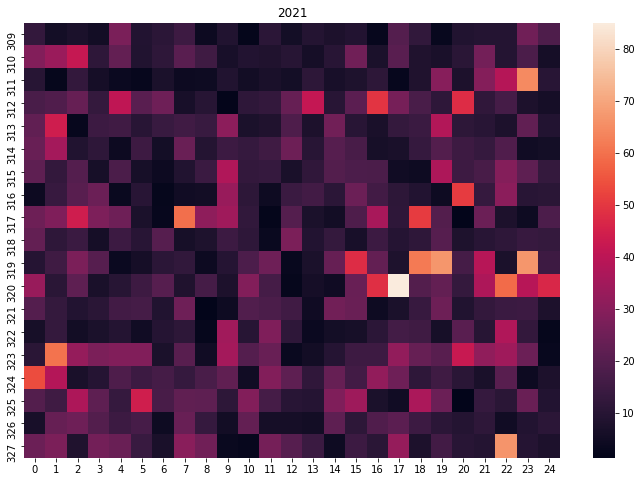

In [21]:
plt.figure(figsize=(12, 8))
sns.heatmap(changeDF.iloc[309:328,:]).set_title("2021")
plt.show()

# 1 hour difference in price heatmaps

In [22]:
diffArr1hr = []
cnt = 0
for i in range(328):
    point = (targetDays.Close[cnt:cnt + 72]).values.reshape(6,12)
    diffArr1hr.append(point.max(axis=1) - point.min(axis=1))
    cnt += 75

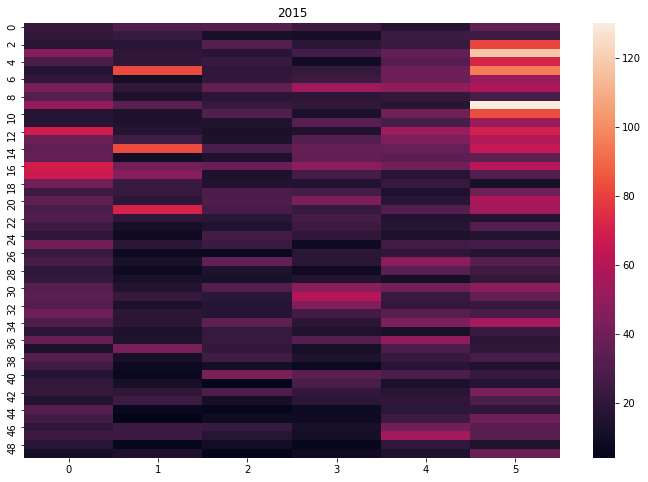

In [23]:
changeDF1hr = pd.DataFrame(diffArr1hr)

plt.figure(figsize=(12, 8))
sns.heatmap(changeDF1hr.iloc[:50,:]).set_title("2015")
plt.show()

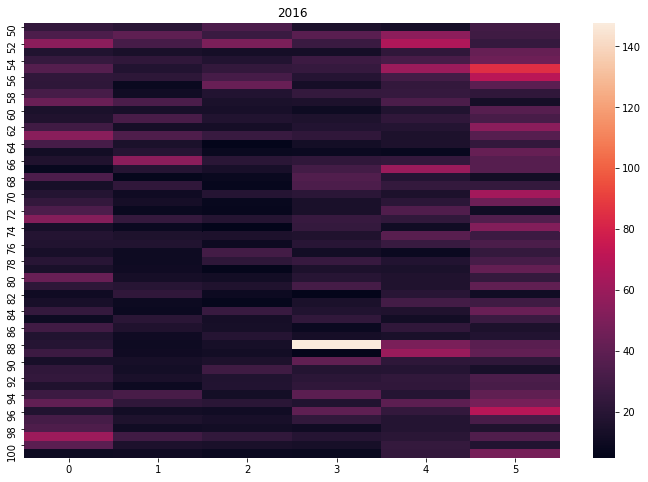

In [24]:
plt.figure(figsize=(12, 8))
sns.heatmap(changeDF1hr.iloc[50:102,:]).set_title("2016")
plt.show()

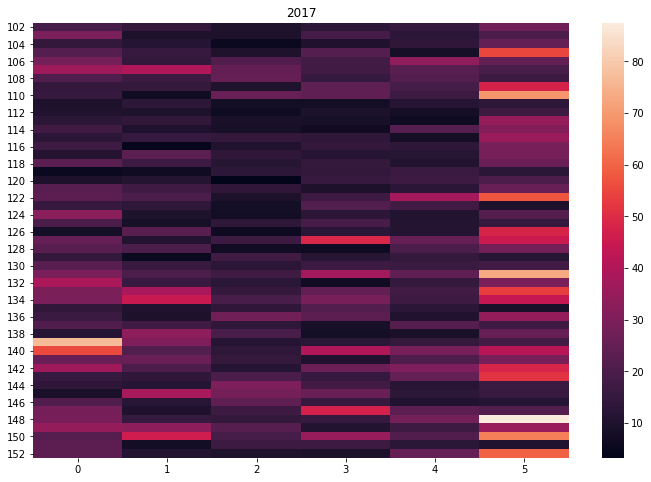

In [25]:
plt.figure(figsize=(12, 8))
sns.heatmap(changeDF1hr.iloc[102:153,:]).set_title("2017")
plt.show()

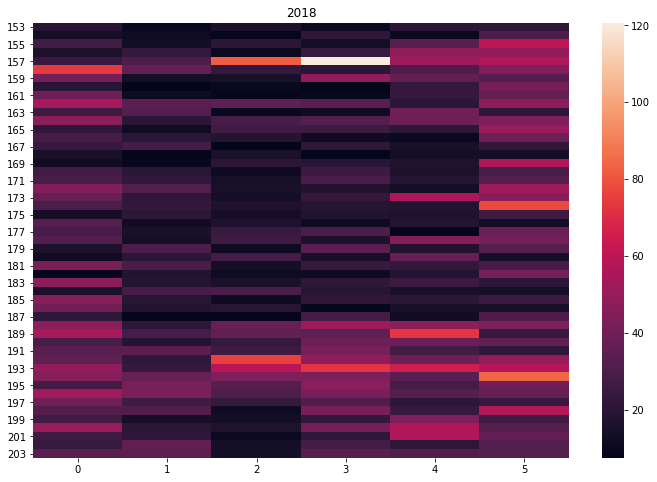

In [26]:
plt.figure(figsize=(12, 8))
sns.heatmap(changeDF1hr.iloc[153:204,:]).set_title("2018")
plt.show()

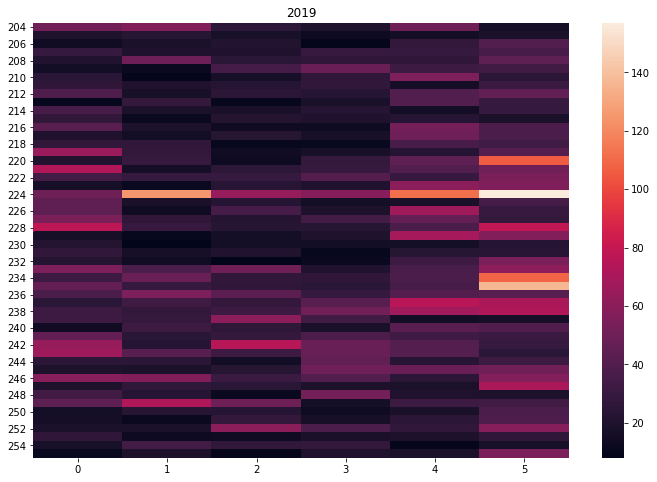

In [27]:
plt.figure(figsize=(12, 8))
sns.heatmap(changeDF1hr.iloc[204:256,:]).set_title("2019")
plt.show()

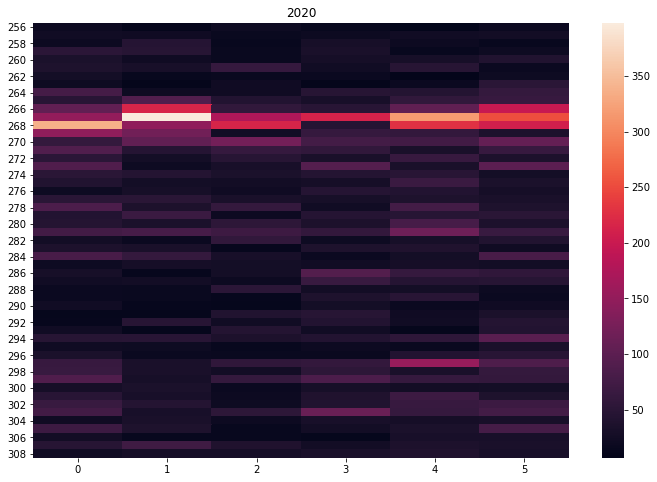

In [28]:
plt.figure(figsize=(12, 8))
sns.heatmap(changeDF1hr.iloc[256:309,:]).set_title("2020")
plt.show()

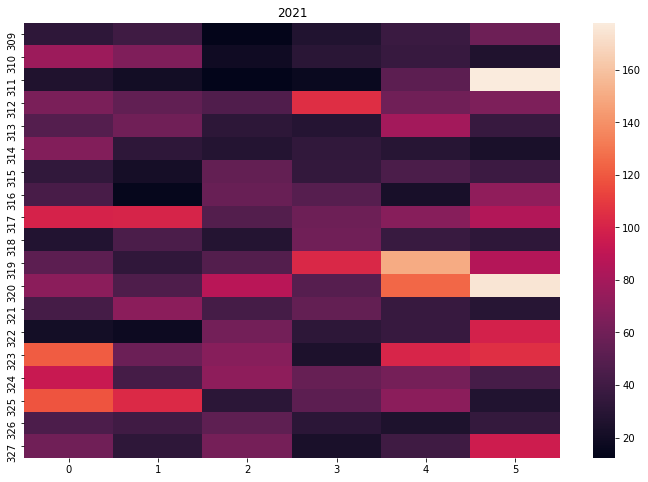

In [29]:
plt.figure(figsize=(12, 8))
sns.heatmap(changeDF1hr.iloc[309:328,:]).set_title("2021")
plt.show()

# 3 hours price difference

In [30]:
diffArr3hrs = []
cnt = 0
for i in range(328):
    point = (targetDays.Close[cnt:cnt + 72]).values.reshape(2,36)
    diffArr3hrs.append(point.max(axis=1) - point.min(axis=1))
    cnt += 75

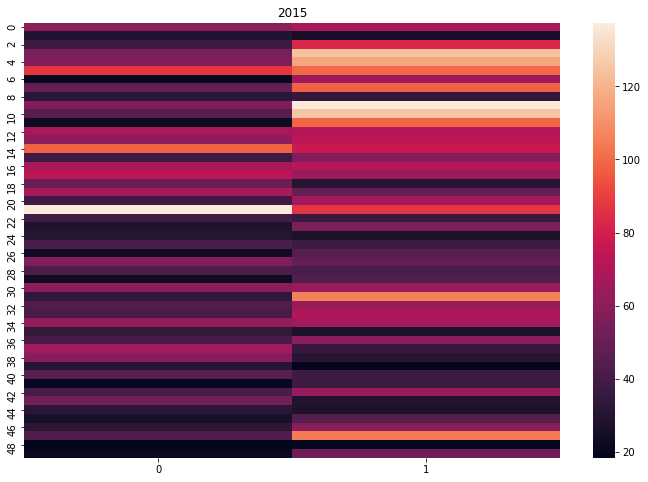

In [31]:
changeDF3hrs = pd.DataFrame(diffArr3hrs)

plt.figure(figsize=(12, 8))
sns.heatmap(changeDF3hrs.iloc[:50,:]).set_title("2015")
plt.show()

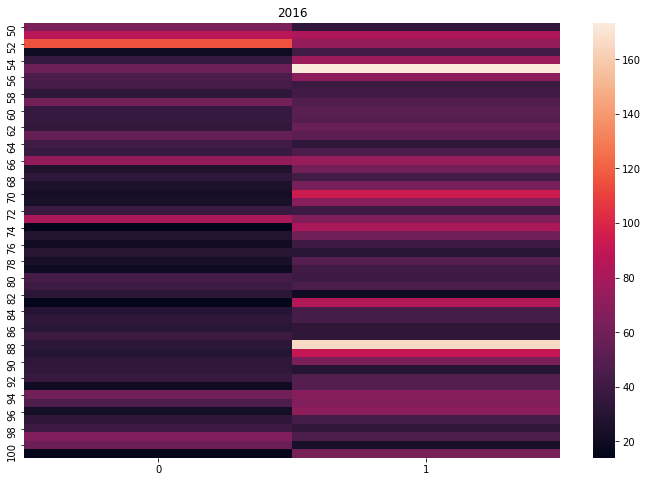

In [32]:
plt.figure(figsize=(12, 8))
sns.heatmap(changeDF3hrs.iloc[50:102,:]).set_title("2016")
plt.show()

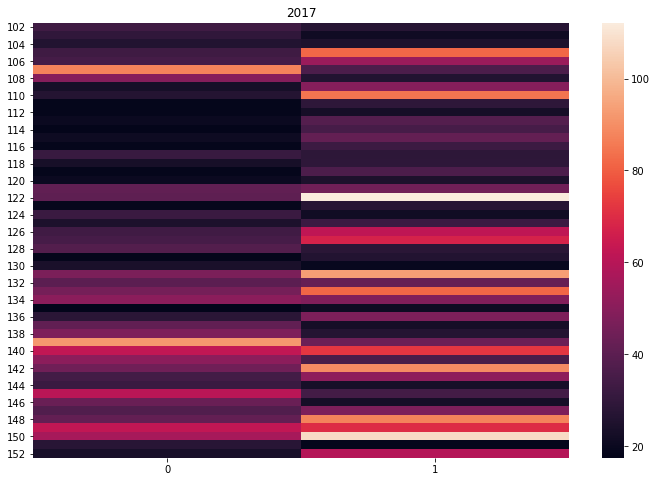

In [33]:
plt.figure(figsize=(12, 8))
sns.heatmap(changeDF3hrs.iloc[102:153,:]).set_title("2017")
plt.show()

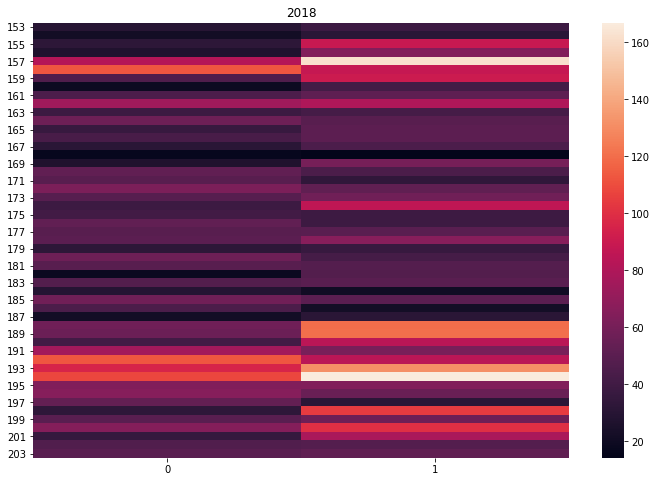

In [34]:
plt.figure(figsize=(12, 8))
sns.heatmap(changeDF3hrs.iloc[153:204,:]).set_title("2018")
plt.show()

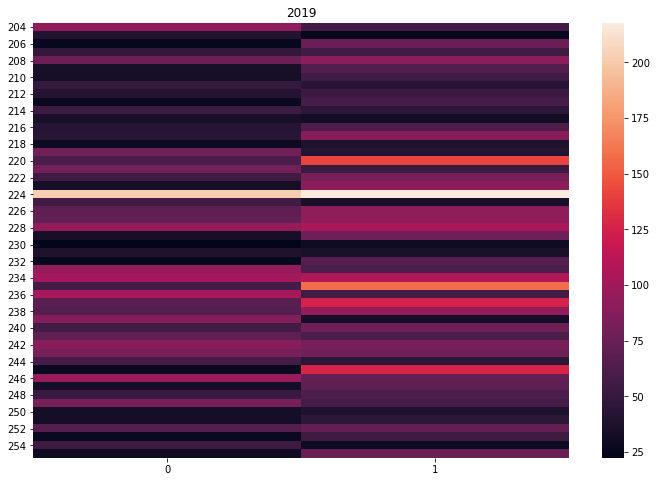

In [35]:
plt.figure(figsize=(12, 8))
sns.heatmap(changeDF3hrs.iloc[204:256,:]).set_title("2019")
plt.show()

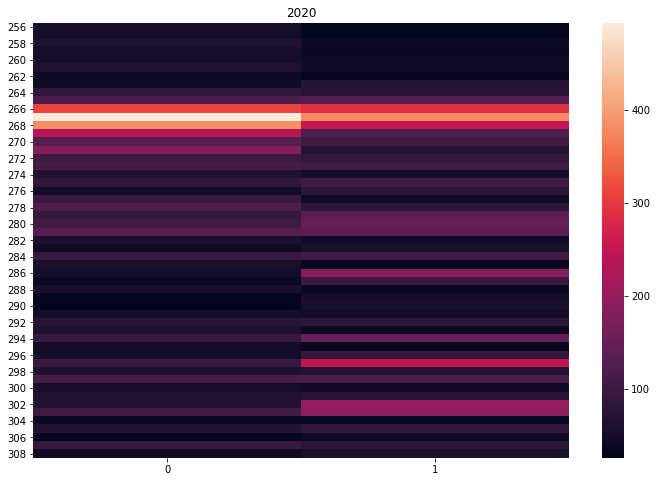

In [36]:
plt.figure(figsize=(12, 8))
sns.heatmap(changeDF3hrs.iloc[256:309,:]).set_title("2020")
plt.show()

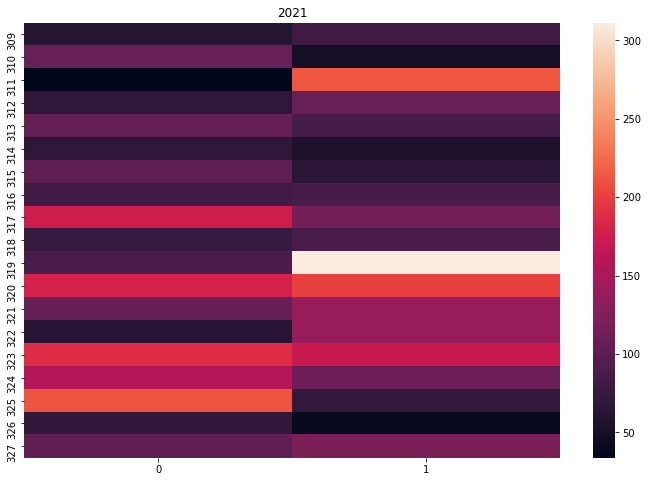

In [37]:
plt.figure(figsize=(12, 8))
sns.heatmap(changeDF3hrs.loc[309:328,:]).set_title("2021")
plt.show()

## Probability of high prices lies in second half as the given numbers suggest

In [38]:
change = changeDF3hrs.iloc[:50,:]
print('2015: ', ((((change.iloc[:,1] - change.iloc[:,0]) > 0).sum())/50)*100)
change = changeDF3hrs.iloc[50:102,:]
print('2016: ', ((((change.iloc[:,1] - change.iloc[:,0]) > 0).sum())/52)*100)
change = changeDF3hrs.iloc[102:153,:]
print('2017: ', ((((change.iloc[:,1] - change.iloc[:,0]) > 0).sum())/51)*100)
change = changeDF3hrs.iloc[153:204,:]
print('2018: ', ((((change.iloc[:,1] - change.iloc[:,0]) > 0).sum())/51)*100)
change = changeDF3hrs.iloc[204:256,:]
print('2019: ', ((((change.iloc[:,1] - change.iloc[:,0]) > 0).sum())/52)*100)
change = changeDF3hrs.iloc[256:309,:]
print('2020: ', ((((change.iloc[:,1] - change.iloc[:,0]) > 0).sum())/53)*100)
change = changeDF3hrs.iloc[309:328,:]
print('2021: ', ((((change.iloc[:,1] - change.iloc[:,0]) > 0).sum())/19)*100)

2015:  64.0
2016:  71.15384615384616
2017:  64.70588235294117
2018:  66.66666666666666
2019:  63.46153846153846
2020:  49.056603773584904
2021:  52.63157894736842


## 3 hours difference in price movement 

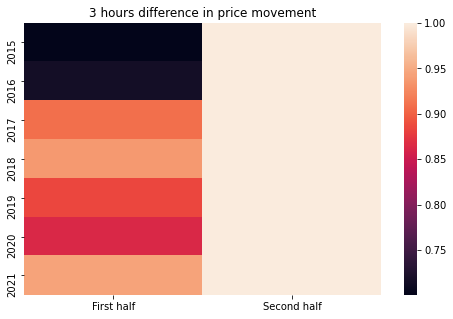

In [39]:
hrs3 = [changeDF3hrs.iloc[:50,:].median().values, 
        changeDF3hrs.iloc[50:102,:].median().values,
        changeDF3hrs.iloc[102:153,:].median().values,
        changeDF3hrs.iloc[153:204,:].median().values,
        changeDF3hrs.iloc[204:256,:].median().values,
        changeDF3hrs.iloc[256:309,:].median().values,
        changeDF3hrs.iloc[309:328,:].median().values]
hrs3 = [item for sublist in hrs3 for item in sublist]
hrs3 = pd.DataFrame(np.array(hrs3).reshape(-1,2))
plt.figure(figsize=(8, 5))
ax = sns.heatmap(hrs3.div(hrs3.max(axis=1), axis=0))
ax.set_xticklabels(['First half', 'Second half'])
ax.set_yticklabels(np.arange(2015,2022))
ax.set_title('3 hours difference in price movement')
plt.show()

## 1 hour difference in price movement

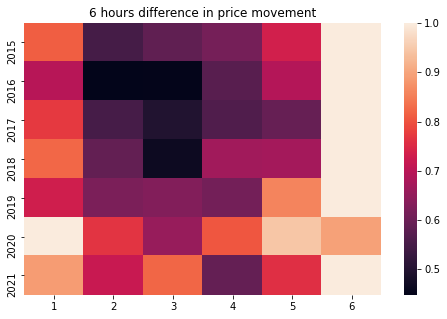

In [40]:
hrs1 = [changeDF1hr.iloc[:50,:].median().values, 
        changeDF1hr.iloc[50:102,:].median().values,
        changeDF1hr.iloc[102:153,:].median().values,
        changeDF1hr.iloc[153:204,:].median().values,
        changeDF1hr.iloc[204:256,:].median().values,
        changeDF1hr.iloc[256:309,:].median().values,
        changeDF1hr.iloc[309:328,:].median().values]
hrs1 = [item for sublist in hrs1 for item in sublist]
hrs1 = pd.DataFrame(np.array(hrs1).reshape(-1,6))
plt.figure(figsize=(8, 5))
ax = sns.heatmap(hrs1.div(hrs1.max(axis=1), axis=0))
ax.set_xticklabels(np.arange(1,7))
ax.set_yticklabels(np.arange(2015,2022))
ax.set_title('6 hours difference in price movement')
plt.show()

## 15 minutes difference in price movement

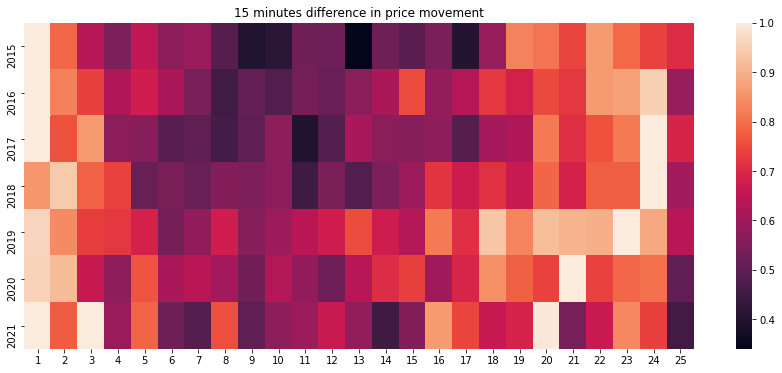

In [41]:
min15 = [changeDF.iloc[:50,:].median().values, 
        changeDF.iloc[50:102,:].median().values,
        changeDF.iloc[102:153,:].median().values,
        changeDF.iloc[153:204,:].median().values,
        changeDF.iloc[204:256,:].median().values,
        changeDF.iloc[256:309,:].median().values,
        changeDF.iloc[309:328,:].median().values]
min15 = [item for sublist in min15 for item in sublist]
min15 = pd.DataFrame(np.array(min15).reshape(-1,25))
plt.figure(figsize=(15, 6))
ax = sns.heatmap(data=min15.div(min15.max(axis=1), axis=0))
# ax.plot_marginals(sns.boxplot)
ax.set_xticklabels(np.arange(1,26))
ax.set_yticklabels(np.arange(2015,2022))
ax.set_title('15 minutes difference in price movement')
plt.show()

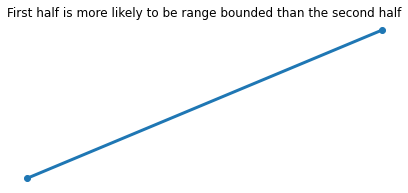

In [42]:
plt.figure(figsize=(7, 3))
plt.plot(hrs3.div(hrs3.max(axis=1), axis=0).median(),  '-o', linewidth=3)
plt.title('First half is more likely to be range bounded than the second half')
plt.axis('off')
plt.show()

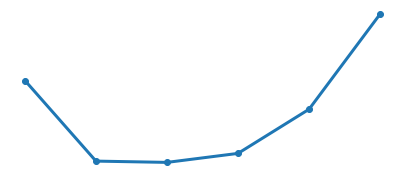

In [43]:
plt.figure(figsize=(7, 3))
plt.plot(hrs1.div(hrs1.max(axis=1), axis=0).median(), '-o', linewidth=3)
plt.axis('off')
plt.show()

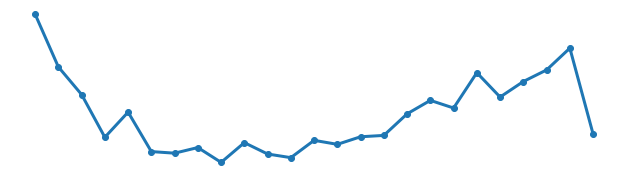

In [44]:
plt.figure(figsize=(11, 3))
plt.plot(min15.div(min15.max(axis=1), axis=0).median(), '-o', linewidth=3)
plt.axis('off')
plt.show()